In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter

# Fn Defn

In [ ]:
class KNNClassifier:
    def __init__(self, k=3):
        """
        Initialize the classifier with the number of neighbors (k).
        """
        self.k = k
        self._X_train = None
        self._y_train = None

    def fit(self, X_train, y_train):
        """
        Fit the model using the training data.

        Parameters:
        X_train : ndarray of shape (n_samples, n_features)
            Training data points.
        y_train : ndarray of shape (n_samples,)
            Target values (class labels) for the training data.
        """
        if X_train.shape[0] != y_train.shape[0]:
            raise ValueError("X_train and y_train must have the same number of samples")

        self._X_train = X_train
        self._y_train = y_train

    def _euclidean_distance(self, x1, x2):
        """
        Calculate the Euclidean distance between two points.

        Parameters:
        x1, x2 : array-like
            Two points to calculate the distance between.

        Returns:
        distance : float
            Euclidean distance between x1 and x2.
        """
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def _predict_one(self, x):
        """
        Predict the class label for a single data point.

        Parameters:
        x : array-like
            Data point to classify.

        Returns:
        label : int
            Predicted class label for the data point.
        """
        # Calculate distances between x and all points in the training set
        distances = [self._euclidean_distance(x, x_train) for x_train in self._X_train]

        # Get the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Get the labels of the k nearest neighbors
        k_nearest_labels = [self._y_train[i] for i in k_indices]

        # Return the most common label (majority vote)
        return Counter(k_nearest_labels).most_common(1)[0][0]

    def predict(self, X_test):
        """
        Predict the class labels for the test data.

        Parameters:
        X_test : ndarray of shape (n_samples, n_features)
            Test data points.

        Returns:
        y_pred : ndarray of shape (n_samples,)
            Predicted class labels.
        """
        if self._X_train is None or self._y_train is None:
            raise ValueError("The model has not been fitted with training data.")

        y_pred = [self._predict_one(x) for x in X_test]
        return np.array(y_pred)

    def score(self, X_val, y_val):
        """
        Calculate the accuracy of the model on the validation set.

        Parameters:
        X_val : ndarray of shape (n_samples, n_features)
            Validation data points.
        y_val : ndarray of shape (n_samples,)
            True class labels for validation data.

        Returns:
        accuracy : float
            The accuracy of the model on the validation data.
        """
        y_pred = self.predict(X_val)
        accuracy = np.sum(y_val == y_pred) / len(y_val)
        return accuracy

def load_csv_data(file_path):
    """
    Load data from a CSV file.

    Parameters:
    file_path : str
        Path to the CSV file.

    Returns:
    X : ndarray of shape (n_samples, 2)
        Feature data (x1 and x2 columns).
    y : ndarray of shape (n_samples,)
        Label data (label column).
    """
    data = pd.read_csv(file_path)

    # Extract feature columns 'x1' and 'x2'
    X = data[['x1', 'x2']].values

    # Extract label column
    y = data['label'].values

    return X, y

def plot_decision_boundary(knn, X_train, y_train, X_test, y_test):
    """
    Plot the decision boundary for KNN predictions.

    Parameters:
    knn : KNNClassifier
        The trained KNN classifier.
    X_train : ndarray of shape (n_samples, 2)
        Training data features.
    y_train : ndarray of shape (n_samples,)
        Training data labels.
    X_test : ndarray of shape (n_samples, 2)
        Test data features.
    y_test : ndarray of shape (n_samples,)
        Test data labels.
    """
    # Create a mesh grid to plot the decision regions
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict labels for each point in the mesh grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green', 'blue')))

    # Plot the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k', cmap=ListedColormap(('red', 'green', 'blue')))

    # Plot the test points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=100, marker='*', edgecolor='k', cmap=ListedColormap(('red', 'green', 'blue')))

    plt.title("KNN Decision Boundary and Test Points")
    plt.show()


# Dataset 1


Test Predictions: [1. 1. 1. 0. 2. 2. 2. 2. 0. 0. 2. 1. 0. 2. 0. 1. 0. 2. 1. 2. 1. 0. 0. 0.
 0. 1. 2. 2. 2. 0. 1. 1. 2. 2. 0. 1. 0. 1. 1. 2. 0. 0. 2. 2. 2. 0. 0. 2.
 0. 2. 0. 1. 1. 0. 2. 2. 0. 1. 1. 1. 1. 2. 0. 2. 0. 1. 2. 0. 0. 1. 0. 0.
 1. 2. 0. 0. 0. 0. 2. 0. 0. 1. 2. 2. 0. 2. 1. 1. 1. 2. 2. 1. 0. 2. 2. 2.
 2. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 2. 0. 1. 0. 2. 1. 2. 1. 1. 2. 0. 2.]
Validation Accuracy: 0.9791666666666666


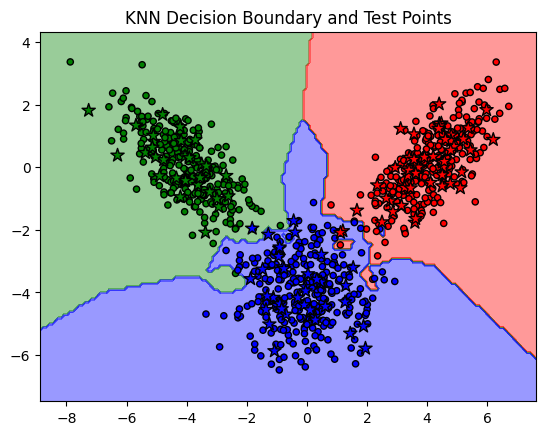

In [ ]:
if __name__ == "__main__":
    # Paths to the CSV files
    train_csv = '/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-1/train.csv'
    test_csv =  '/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-1/test.csv'
    val_csv = '/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-1/val.csv'
    # Load the data from CSV files
    X_train, y_train = load_csv_data(train_csv)
    X_test, y_test = load_csv_data(test_csv)
    X_val, y_val = load_csv_data(val_csv)

    # Initialize KNN classifier with k=3
    knn = KNNClassifier(k=1)

    # Fit the model with the training data
    knn.fit(X_train, y_train)

    # Predict on the test dataset
    y_pred_test = knn.predict(X_test)
    print("Test Predictions:", y_pred_test)

    # Calculate accuracy on the validation set
    val_accuracy = knn.score(X_val, y_val)
    print("Validation Accuracy:", val_accuracy)

    # Plot the decision boundary and test results
    plot_decision_boundary(knn, X_train, y_train, X_test, y_test)

Test Predictions: [1. 1. 1. 0. 2. 2. 2. 2. 0. 0. 2. 1. 0. 2. 0. 1. 0. 2. 1. 2. 1. 0. 0. 0.
 0. 1. 2. 2. 2. 0. 1. 1. 2. 2. 0. 1. 0. 1. 1. 2. 0. 0. 2. 2. 2. 0. 0. 2.
 0. 2. 0. 1. 1. 0. 2. 2. 0. 1. 1. 1. 1. 2. 0. 2. 0. 1. 2. 0. 0. 1. 0. 0.
 1. 2. 0. 0. 0. 0. 2. 0. 0. 1. 2. 2. 0. 2. 1. 1. 1. 2. 2. 1. 0. 2. 2. 2.
 2. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 2. 0. 1. 0. 2. 1. 2. 1. 1. 2. 0. 2.]
Validation Accuracy: 0.9916666666666667


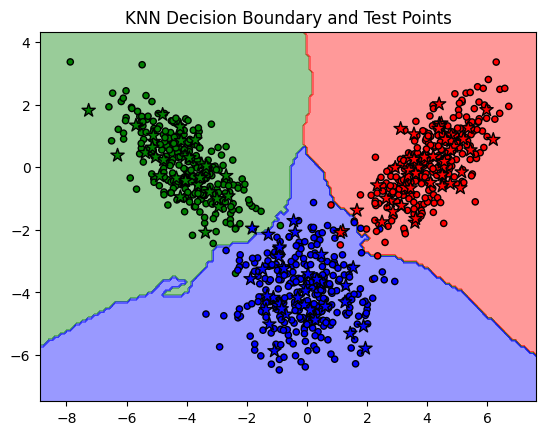

In [ ]:
if __name__ == "__main__":
    # Paths to the CSV files
    train_csv = '/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-1/train.csv'
    test_csv =  '/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-1/test.csv'
    val_csv = '/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-1/val.csv'

    # Load the data from CSV files
    X_train, y_train = load_csv_data(train_csv)
    X_test, y_test = load_csv_data(test_csv)
    X_val, y_val = load_csv_data(val_csv)

    # Initialize KNN classifier with k=5
    knn = KNNClassifier(k=5)

    # Fit the model with the training data
    knn.fit(X_train, y_train)

    # Predict on the test dataset
    y_pred_test = knn.predict(X_test)
    print("Test Predictions:", y_pred_test)

    # Calculate accuracy on the validation set
    val_accuracy = knn.score(X_val, y_val)
    print("Validation Accuracy:", val_accuracy)

    # Plot the decision boundary and test results
    plot_decision_boundary(knn, X_train, y_train, X_test, y_test)

Test Predictions: [1. 1. 1. 0. 2. 2. 2. 2. 0. 0. 2. 1. 0. 2. 0. 1. 0. 2. 1. 2. 1. 0. 0. 0.
 0. 1. 2. 2. 2. 0. 1. 1. 2. 2. 0. 1. 0. 1. 1. 2. 0. 0. 2. 2. 2. 0. 0. 2.
 0. 2. 0. 1. 1. 0. 2. 2. 0. 1. 1. 1. 1. 2. 0. 2. 0. 1. 2. 0. 0. 1. 0. 0.
 1. 2. 0. 0. 0. 0. 2. 0. 0. 1. 2. 2. 0. 2. 1. 1. 1. 2. 2. 1. 0. 2. 2. 2.
 2. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 2. 0. 1. 0. 2. 1. 2. 1. 1. 2. 0. 2.]
Validation Accuracy: 0.9916666666666667


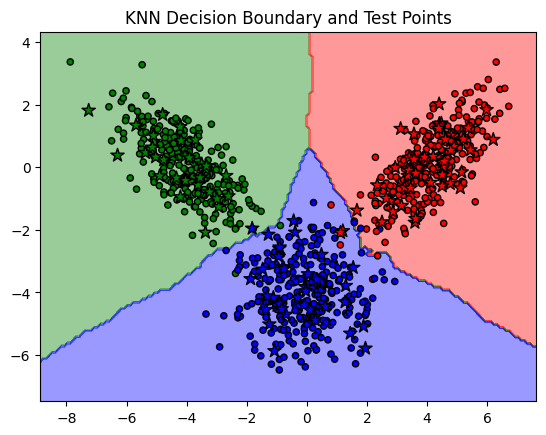

In [ ]:
if __name__ == "__main__":
    # Paths to the CSV files
    train_csv = '/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-1/train.csv'
    test_csv =  '/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-1/test.csv'
    val_csv = '/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-1/val.csv'

    # Load the data from CSV files
    X_train, y_train = load_csv_data(train_csv)
    X_test, y_test = load_csv_data(test_csv)
    X_val, y_val = load_csv_data(val_csv)

    # Initialize KNN classifier with k=9
    knn = KNNClassifier(k=9)

    # Fit the model with the training data
    knn.fit(X_train, y_train)

    # Predict on the test dataset
    y_pred_test = knn.predict(X_test)
    print("Test Predictions:", y_pred_test)

    # Calculate accuracy on the validation set
    val_accuracy = knn.score(X_val, y_val)
    print("Validation Accuracy:", val_accuracy)

    # Plot the decision boundary and test results
    plot_decision_boundary(knn, X_train, y_train, X_test, y_test)

# Dataset 2

Test Predictions: [1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1
 1 0 0 0 0 1]
Validation Accuracy: 1.0


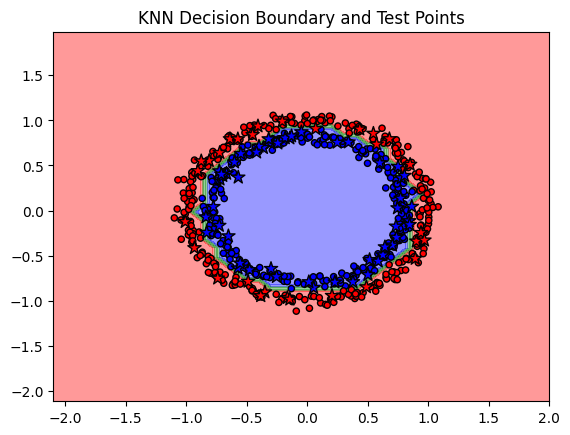

In [ ]:
if __name__ == "__main__":
    # Paths to the CSV files
    train_csv = '/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-2/Train.csv'
    test_csv = '/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-2/Test.csv'
    val_csv = '/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-2/Val.csv'

    # Load the data from CSV files
    X_train, y_train = load_csv_data(train_csv)
    X_test, y_test = load_csv_data(test_csv)
    X_val, y_val = load_csv_data(val_csv)

    # Initialize KNN classifier with k=1
    knn = KNNClassifier(k=1)

    # Fit the model with the training data
    knn.fit(X_train, y_train)

    # Predict on the test dataset
    y_pred_test = knn.predict(X_test)
    print("Test Predictions:", y_pred_test)

    # Calculate accuracy on the validation set
    val_accuracy = knn.score(X_val, y_val)
    print("Validation Accuracy:", val_accuracy)

    # Plot the decision boundary and test results
    plot_decision_boundary(knn, X_train, y_train, X_test, y_test)

Test Predictions: [1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1
 1 0 0 0 0 1]
Validation Accuracy: 1.0


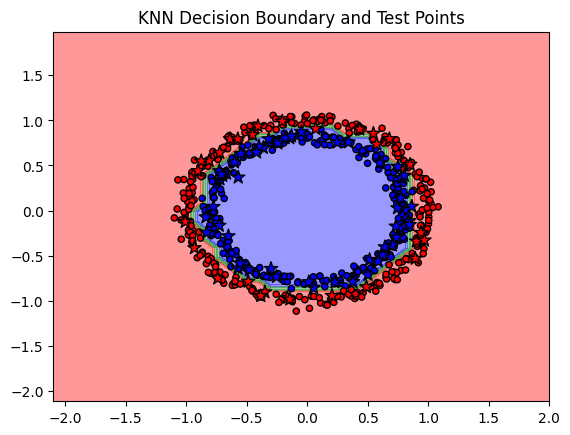

In [ ]:
if __name__ == "__main__":
    # Paths to the CSV files
    train_csv = '/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-2/Train.csv'
    test_csv = '/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-2/Test.csv'
    val_csv = '/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-2/Val.csv'

    # Load the data from CSV files
    X_train, y_train = load_csv_data(train_csv)
    X_test, y_test = load_csv_data(test_csv)
    X_val, y_val = load_csv_data(val_csv)

    # Initialize KNN classifier with k=5
    knn = KNNClassifier(k=5)

    # Fit the model with the training data
    knn.fit(X_train, y_train)

    # Predict on the test dataset
    y_pred_test = knn.predict(X_test)
    print("Test Predictions:", y_pred_test)

    # Calculate accuracy on the validation set
    val_accuracy = knn.score(X_val, y_val)
    print("Validation Accuracy:", val_accuracy)

    # Plot the decision boundary and test results
    plot_decision_boundary(knn, X_train, y_train, X_test, y_test)

Test Predictions: [1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 0 0 0 1]
Validation Accuracy: 1.0


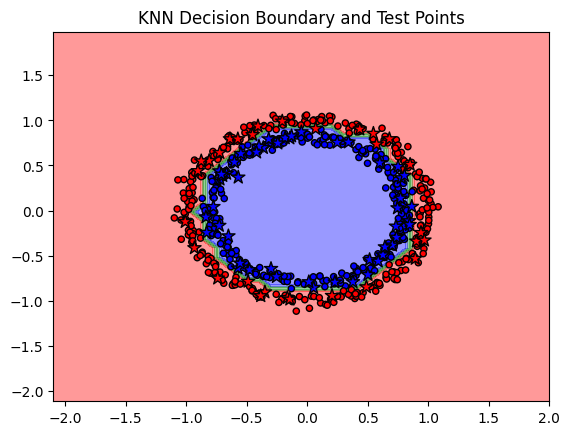

In [ ]:
if __name__ == "__main__":
    # Paths to the CSV files
    train_csv = '/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-2/Train.csv'
    test_csv = '/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-2/Test.csv'
    val_csv = '/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-2/Val.csv'

    # Load the data from CSV files
    X_train, y_train = load_csv_data(train_csv)
    X_test, y_test = load_csv_data(test_csv)
    X_val, y_val = load_csv_data(val_csv)

    # Initialize KNN classifier with k=9
    knn = KNNClassifier(k=9)

    # Fit the model with the training data
    knn.fit(X_train, y_train)

    # Predict on the test dataset
    y_pred_test = knn.predict(X_test)
    print("Test Predictions:", y_pred_test)

    # Calculate accuracy on the validation set
    val_accuracy = knn.score(X_val, y_val)
    print("Validation Accuracy:", val_accuracy)

    # Plot the decision boundary and test results
    plot_decision_boundary(knn, X_train, y_train, X_test, y_test)

# Dataset - 3


In [ ]:
# Load the datasets
train_data = pd.read_csv('/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-3/train_data.csv', header=None)
X_train = train_data.values[:, :-1]  # All columns except the last one as features
y_train = pd.read_csv('/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-3/train_label.csv', header=None).values.flatten()

valid_data = pd.read_csv('/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-3/val_data.csv', header=None)
X_valid = valid_data.values[:, :-1]  # All columns except the last one as features
y_valid = pd.read_csv('/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-3/val_label.csv', header=None).values.flatten()

test_data = pd.read_csv('/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-3/test_data.csv', header=None)
X_test = test_data.values[:, :-1]  # All columns except the last one as features
y_test = pd.read_csv('/content/drive/MyDrive/SEM1/PRML/LAB_2/dataset/Dataset-3/test_label.csv', header=None).values.flatten()


# Normalize the data
def normalize(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test = normalize(X_test)

# Implement KNN from scratch
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def mode(labels):
    count = Counter(labels)
    max_count = max(count.values())
    modes = [k for k, v in count.items() if v == max_count]
    return modes[0]

def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for x in X_test:
        distances = [euclidean_distance(x, x_train) for x_train in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common = mode(k_nearest_labels)
        y_pred.append(most_common)
    return np.array(y_pred)

# Calculate accuracy and confusion matrix
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred):
    labels = np.unique(np.concatenate((y_true, y_pred)))
    matrix = np.zeros((len(labels), len(labels)), dtype=int)
    label_to_index = {label: idx for idx, label in enumerate(labels)}

    for true, pred in zip(y_true, y_pred):
        matrix[label_to_index[true], label_to_index[pred]] += 1

    return matrix, labels

def print_confusion_matrix(matrix, labels):
    print("Confusion Matrix:")
    print("Labels:", labels)
    print(matrix)

# Header for the output table
print(f'{"K":<5} {"Train Accuracy":<20} {"Validation Accuracy":<20} {"Test Accuracy":<20}')

# Train KNN and make predictions for all k values
k_values = [1, 7, 15]
train_accuracies = []
valid_accuracies = []
test_accuracies = []

# Finding best k based on validation accuracy
for k in k_values:
    y_train_pred = knn_predict(X_train, y_train, X_train, k)
    y_valid_pred = knn_predict(X_train, y_train, X_valid, k)
    y_test_pred = knn_predict(X_train, y_train, X_test, k)

    train_acc = accuracy(y_train, y_train_pred) * 100
    valid_acc = accuracy(y_valid, y_valid_pred) * 100
    test_acc = accuracy(y_test, y_test_pred) * 100

    train_accuracies.append(train_acc)
    valid_accuracies.append(valid_acc)
    test_accuracies.append(test_acc)

    # Print the accuracies for this value of k
    print(f'{k:<5} {train_acc:<20} {valid_acc:<20} {test_acc:<20}')

# Choose the best k based on validation accuracy
best_k = k_values[np.argmax(valid_accuracies)]
print(f"\nBest K based on Validation Accuracy: {best_k}")

# Confusion matrix for the best k
best_y_train_pred = knn_predict(X_train, y_train, X_train, best_k)
best_y_test_pred = knn_predict(X_train, y_train, X_test, best_k)

train_conf_matrix, train_labels = confusion_matrix(y_train, best_y_train_pred)
test_conf_matrix, test_labels = confusion_matrix(y_test, best_y_test_pred)

print("\nConfusion Matrix (Training Data):")
print_confusion_matrix(train_conf_matrix, train_labels)

print("\nConfusion Matrix (Test Data):")
print_confusion_matrix(test_conf_matrix, test_labels)

K     Train Accuracy       Validation Accuracy  Test Accuracy       
1     100.0                41.333333333333336   39.666666666666664  
7     68.0952380952381     40.666666666666664   40.166666666666664  
15    58.19047619047619    43.0                 40.0                

Best K based on Validation Accuracy: 15

Confusion Matrix (Training Data):
Confusion Matrix:
Labels: [0. 1. 2. 3. 4.]
[[278  26  30  45  41]
 [ 10 220  25  51 114]
 [ 22  38 190  80  90]
 [ 12  26  32 253  97]
 [  7  41  27  64 281]]

Confusion Matrix (Test Data):
Confusion Matrix:
Labels: [0. 1. 2. 3. 4.]
[[62 11  8 13 26]
 [11 32  6 18 53]
 [13  9 33 34 31]
 [ 9 17 17 45 32]
 [ 3 19  6 24 68]]
